Sales data analysis using pandas

In [44]:
#importing necessary libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#import one month dataset
df = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_April_2019.csv')
df.shape

(18383, 6)

In [46]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [47]:
#import whole dataset and concate them as csv file
import os
files = os.listdir('/content/drive/MyDrive/Sales_Data')
data = pd.DataFrame()
path = '/content/drive/MyDrive/Sales_Data'
for i in files:
  a = pd.read_csv(path +'/'+ i)
  data = pd.concat([data, a])

In [48]:
#save merged dataset
data.to_csv('sales_dataset.csv')
!cp sales_dataset.csv 'drive/MyDrive/Sales_data'

Basic dataset info

In [49]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [50]:
data.shape

(186850, 6)

In [51]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 14370
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [53]:
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


Data cleanning

In [54]:
df_null = data[data.isnull().any(axis=1)]

In [55]:
df_null.shape

(545, 6)

In [56]:
df_null.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
312,NaN,NaN,NaN,NaN,NaN,NaN
1222,NaN,NaN,NaN,NaN,NaN,NaN
2648,NaN,NaN,NaN,NaN,NaN,NaN
2685,NaN,NaN,NaN,NaN,NaN,NaN
3119,NaN,NaN,NaN,NaN,NaN,NaN


There is 545 rows which contains NaN values.

In [57]:
#removing nan rows
data = data.dropna(how='any')

In [58]:
data.shape

(186305, 6)

In [59]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [60]:
#finding rows contains Quantity Ordered
data[data['Quantity Ordered'] == 'Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
211,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
243,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1291,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1412,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1427,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10309,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11989,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
12037,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
12681,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [61]:
data = data[data['Quantity Ordered'] != 'Quantity Ordered']

In [62]:
data.shape

(185950, 6)

In [63]:
#check for duplicated rows
data[data.duplicated(keep=False)].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
627,237276,Lightning Charging Cable,1,14.95,08/22/19 10:43,"446 2nd St, Boston, MA 02215"
628,237276,Lightning Charging Cable,1,14.95,08/22/19 10:43,"446 2nd St, Boston, MA 02215"
924,237560,USB-C Charging Cable,1,11.95,08/09/19 00:26,"397 Lincoln St, San Francisco, CA 94016"
925,237560,USB-C Charging Cable,1,11.95,08/09/19 00:26,"397 Lincoln St, San Francisco, CA 94016"
2259,238842,Wired Headphones,1,11.99,08/28/19 17:59,"320 Park St, San Francisco, CA 94016"


In [64]:
#remove duplicate rows with same product name and order date
data.drop_duplicates(subset=['Product', 'Order Date', 'Purchase Address'], keep='first', inplace=True, ignore_index=True)

#converting features in their proper type

In [65]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185639 entries, 0 to 185638
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185639 non-null  object        
 1   Product           185639 non-null  object        
 2   Quantity Ordered  185639 non-null  int64         
 3   Price Each        185639 non-null  float64       
 4   Order Date        185639 non-null  datetime64[ns]
 5   Purchase Address  185639 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 8.5+ MB


Adding some important features

In [67]:
#adding month column
data['Month'] = data['Order Date'].dt.month

In [68]:
#adding total sales column
data['Sales'] = data['Quantity Ordered'] * data['Price Each']

In [69]:
#add city column
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

data['City'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

In [70]:
#add hour column
data['Hours'] = data['Order Date'].dt.hour

In [71]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle (WA),22
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas (TX),15
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,Portland (OR),14
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles (CA),20
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.68,New York City (NY),19


Question 1: What was the best month for sales? How much was earned that month?

In [72]:
sales = data.groupby('Month')['Sales'].sum()
sales.sort_values()

Month
1     1.821413e+06
9     2.094454e+06
2     2.200012e+06
8     2.241043e+06
6     2.576265e+06
7     2.646434e+06
3     2.804955e+06
5     3.150538e+06
11    3.197823e+06
4     3.389203e+06
10    3.734715e+06
12    4.608220e+06
Name: Sales, dtype: float64

In [73]:
#best sales month
sales[sales == sales.max()]

Month
12    4.608220e+06
Name: Sales, dtype: float64

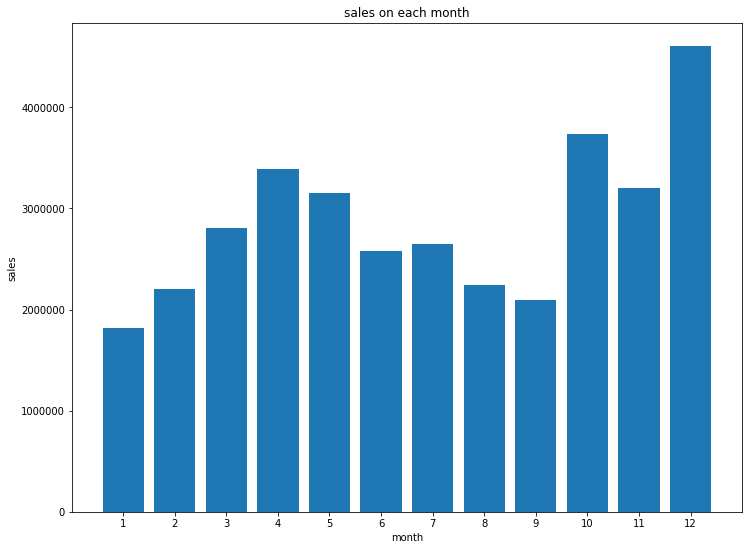

In [74]:
#ploting barplot
plt.figure(figsize=(12,9))
x = np.arange(1, 13)
plt.bar(x, data.groupby('Month')['Sales'].sum())
plt.title('sales on each month')
plt.ticklabel_format(style='plain')
plt.xticks(x)
plt.xlabel('month')
plt.ylabel('sales')
plt.show()

Obervation:

> Best sales month is 12th month and total sold ammount is  4.613443e+06



Question 2: What city sold the most product?

In [75]:
city_sales = data.groupby('City')['Sales'].sum()
city_sales.sort_values()

City
Portland  (ME)         4.493094e+05
Austin  (TX)           1.818003e+06
Portland  (OR)         1.869968e+06
Seattle  (WA)          2.745020e+06
Dallas  (TX)           2.765323e+06
Atlanta  (GA)          2.794180e+06
Boston  (MA)           3.658576e+06
New York City  (NY)    4.661786e+06
Los Angeles  (CA)      5.448276e+06
San Francisco  (CA)    8.254633e+06
Name: Sales, dtype: float64

In [76]:
city_sales[city_sales == city_sales.max()]

City
San Francisco  (CA)    8.254633e+06
Name: Sales, dtype: float64

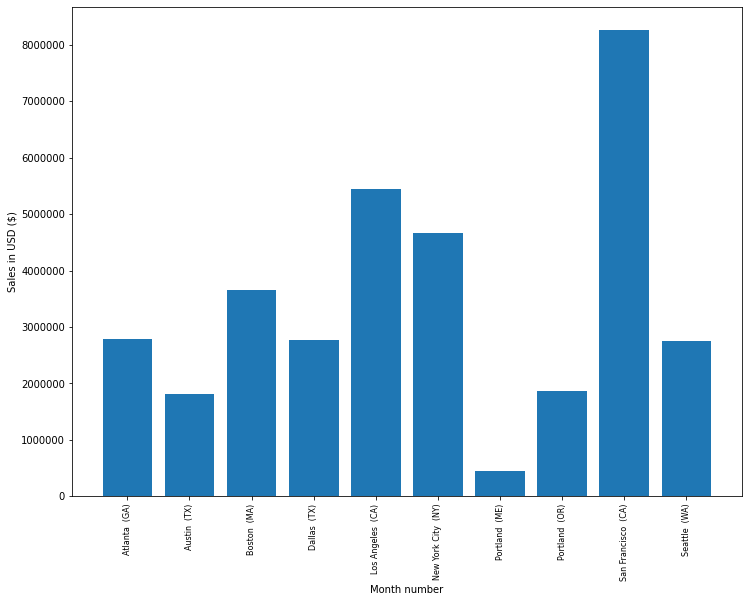

In [77]:
#ploting barplot
keys = [city for city, df in city_sales.items()]

plt.figure(figsize=(12,9))
plt.bar(keys, data.groupby(['City']).sum()['Sales'])
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

Obesrvation:

> best sale city is san francisco(ca) sold ammount is  8.262204e+06



Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [78]:
hours_sales = data.groupby('Hours')['Sales'].sum()
hours_sales.sort_values()

Hours
3      145735.26
4      162546.07
5      230652.88
2      234839.45
6      447924.14
1      460563.90
0      713548.66
7      744052.34
23    1177769.78
8     1192309.20
22    1606240.01
9     1638738.34
16    1902511.24
15    1940564.70
10    1942948.38
21    2040720.86
14    2082507.72
17    2126538.18
13    2152353.33
18    2218343.29
20    2280784.36
11    2296613.86
12    2314315.01
19    2411954.49
Name: Sales, dtype: float64

In [79]:
hours_sales[hours_sales == hours_sales.max()]

Hours
19    2411954.49
Name: Sales, dtype: float64

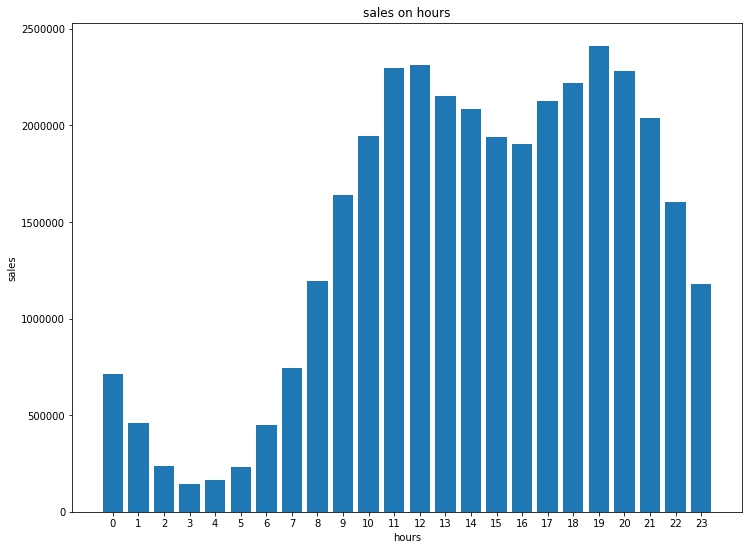

In [80]:
#plot barplot
plt.figure(figsize=(12,9))
hours = [hours for hours, df in data.groupby('Hours')]
plt.bar(hours, data.groupby('Hours')['Sales'].sum())
plt.title('sales on hours')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(hours)
plt.xlabel('hours')
plt.ylabel('sales')
plt.show()

Obervation:

> best time to advertise is 12 to 13 and 19 to 20 between that time sales is maximum.



Question 4: What product sold the most? Why do you think it sold the most?

In [81]:
product_df = data.groupby('Product')['Quantity Ordered'].sum()
product_df.sort_values()

Product
LG Dryer                        646
LG Washing Machine              666
Vareebadd Phone                2068
20in Monitor                   4126
ThinkPad Laptop                4128
Macbook Pro Laptop             4725
Flatscreen TV                  4813
Google Phone                   5529
34in Ultrawide Monitor         6192
27in 4K Gaming Monitor         6239
iPhone                         6847
27in FHD Monitor               7541
Bose SoundSport Headphones    13430
Apple Airpods Headphones      15637
Wired Headphones              20522
Lightning Charging Cable      23158
USB-C Charging Cable          23926
AA Batteries (4-pack)         27588
AAA Batteries (4-pack)        30949
Name: Quantity Ordered, dtype: int64

In [82]:
product_df[product_df == product_df.max()]

Product
AAA Batteries (4-pack)    30949
Name: Quantity Ordered, dtype: int64

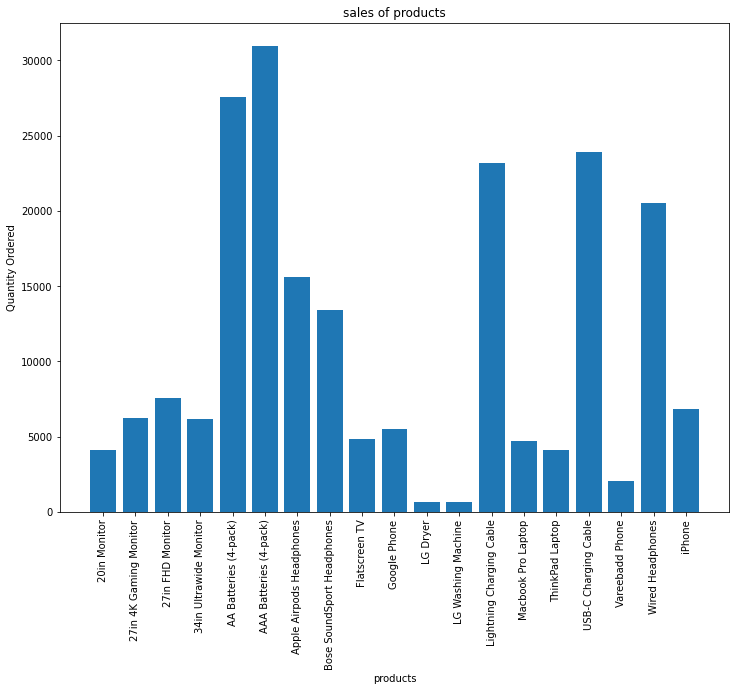

In [83]:
#ploting barplot
products = [product for product, df in data.groupby('Product')]
plt.figure(figsize=(12, 9))
plt.title('sales of products')
plt.bar(products, data.groupby('Product')['Quantity Ordered'].sum())
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('products')
plt.ylabel('Quantity Ordered')
plt.xticks(products, rotation='vertical')
plt.show()

In [84]:
prices_df = data.groupby('Product').mean()['Price Each']
prices_df.sort_values()

Product
AAA Batteries (4-pack)           2.99
AA Batteries (4-pack)            3.84
USB-C Charging Cable            11.95
Wired Headphones                11.99
Lightning Charging Cable        14.95
Bose SoundSport Headphones      99.99
20in Monitor                   109.99
27in FHD Monitor               149.99
Apple Airpods Headphones       150.00
Flatscreen TV                  300.00
34in Ultrawide Monitor         379.99
27in 4K Gaming Monitor         389.99
Vareebadd Phone                400.00
Google Phone                   600.00
LG Washing Machine             600.00
LG Dryer                       600.00
iPhone                         700.00
ThinkPad Laptop                999.99
Macbook Pro Laptop            1700.00
Name: Price Each, dtype: float64

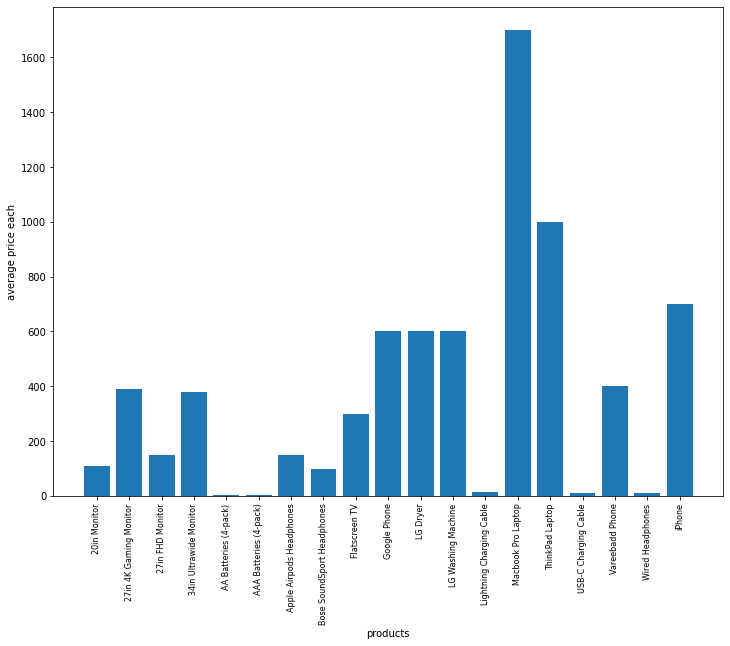

In [85]:
#bar plot between average product price vs products
plt.figure(figsize=(12,9))
plt.bar(products, data.groupby('Product')['Price Each'].mean())
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('products')
plt.ylabel('average price each')
plt.show()

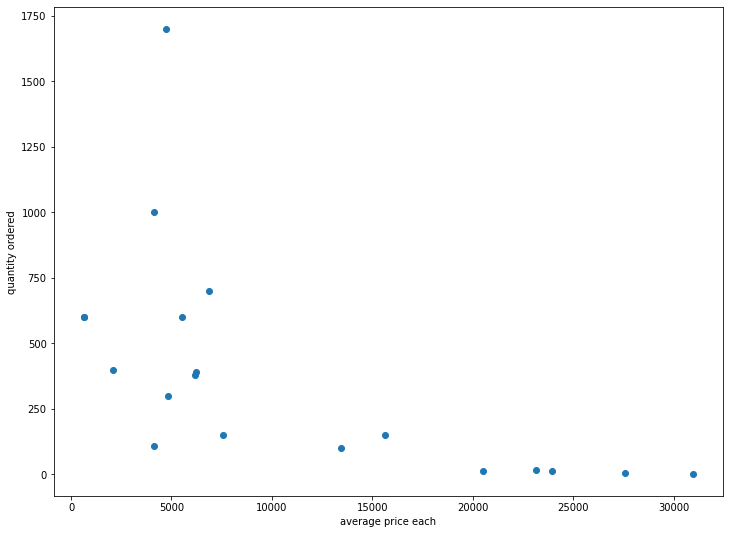

In [86]:
#relationship between average price each of products and total sales of products
plt.figure(figsize=(12,9))
plt.scatter(product_df, prices_df)
plt.xlabel('average price each')
plt.ylabel('quantity ordered')
plt.show()

Observation:

> Most sold items are AAA Batteries (4-pack), AA Batteries (4-pack), USB-C Charging Cable etc, may be because their price each are low. 



Question 5: What products are most often sold together?